In [250]:
# Run the capstone_venv so necessary packages are available.
# Import section.

import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [251]:
# Downloaded capstone project data from Kaggle:
# https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/download?datasetVersionNumber=2

# Unzipped the archive into a directory on my local machine.
my_data_path = "/Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/"
training_path = my_data_path + "Training/"
testing_path = my_data_path + "Testing/"

In [252]:
# Check the training file counts to see if they match the file counts provided in the documentation for the data.

training_glioma_count = len(os.listdir(training_path+"glioma_tumor/"))
training_meningioma_count = len(os.listdir(training_path+"meningioma_tumor/"))
training_pituitary_count = len(os.listdir(training_path+"pituitary_tumor/"))
training_no_count = len(os.listdir(training_path+"no_tumor/"))

print("Number of training files for glioma tumors:", training_glioma_count)
print("Number of training files for meningioma tumors:", training_meningioma_count)
print("Number of training files for pituitary tumors:", training_pituitary_count)
print("Number of training files for no tumors:", training_no_count)


Number of training files for glioma tumors: 826
Number of training files for meningioma tumors: 822
Number of training files for pituitary tumors: 827
Number of training files for no tumors: 395


In [253]:
# Note that the number of training files for the no tumors images is roughly half of the number of training images for
# the other tumor classes. This imbalance is addressed further down in the notebook.


In [254]:
# Check the testing file counts to see if they match the file counts provided in the documentation for the data.

testing_glioma_count = len(os.listdir(testing_path+"glioma_tumor/"))
testing_meningioma_count = len(os.listdir(testing_path+"meningioma_tumor/"))
testing_pituitary_count = len(os.listdir(testing_path+"pituitary_tumor/"))
testing_no_count = len(os.listdir(testing_path+"no_tumor/"))

print("Number of testing files for glioma tumors:", testing_glioma_count)
print("Number of testing files for meningioma tumors:", testing_meningioma_count)
print("Number of testing files for pituitary tumors:", testing_pituitary_count)
print("Number of testing files for no tumors:", testing_no_count)

Number of testing files for glioma tumors: 100
Number of testing files for meningioma tumors: 115
Number of testing files for pituitary tumors: 74
Number of testing files for no tumors: 105


In [255]:
# File counts for both training and testing data match the documentation.

# Load the data and begin the exploration.

# Per the source data, images are 512x512.

labels = ["glioma_tumor", "meningioma_tumor","pituitary_tumor", "no_tumor"]

# for i in tqdm(range(20)):

# Load the training data.
X_train = []
y_train = []

# Resize images to a smaller size to simplify processing.
#image_size = 512
image_size = 256

for label in labels:
    folder_path = os.path.join(training_path, label)
    print("Training image folder path:", folder_path)

    # Use tqdm to show progress bar.
    for image_filename in tqdm(os.listdir(folder_path)):
       image = cv2.imread(os.path.join(folder_path, image_filename))
       image = cv2.resize(image,(image_size, image_size))
       X_train.append(image)
       y_train.append(label)


Training image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Training/glioma_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 826/826 [00:00<00:00, 2226.06it/s]


Training image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Training/meningioma_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 822/822 [00:00<00:00, 2265.38it/s]


Training image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Training/pituitary_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:00<00:00, 2002.32it/s]


Training image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Training/no_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 395/395 [00:00<00:00, 2166.83it/s]


In [256]:
# Load the test data.

# Can load into a separate structure, or 
# load into the same structure as the training data and use train test split later to create validation and test datasets.
# Chose to load into the same structure.

# Load the testing data.

for label in labels:
    folder_path = os.path.join(testing_path, label)
    print("Testing image folder path:", folder_path)
    for image_filename in tqdm(os.listdir(folder_path)):
       image = cv2.imread(os.path.join(folder_path, image_filename))
       image = cv2.resize(image,(image_size, image_size))
       X_train.append(image)
       y_train.append(label)


Testing image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Testing/glioma_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1116.94it/s]


Testing image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Testing/meningioma_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 2160.14it/s]


Testing image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Testing/pituitary_tumor


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 910.00it/s]


Testing image folder path: /Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/archive/Testing/no_tumor


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3551.86it/s]


In [257]:
# Convert to Numpy arrays for easier manipulation and display the shape of the data.
X_array = np.array(X_train)
y_array = np.array(y_train)

print("X array shape:", X_array.shape)
print("Y array shape:", y_array.shape, y_array.dtype)

X array shape: (3264, 256, 256, 3)
Y array shape: (3264,) <U16


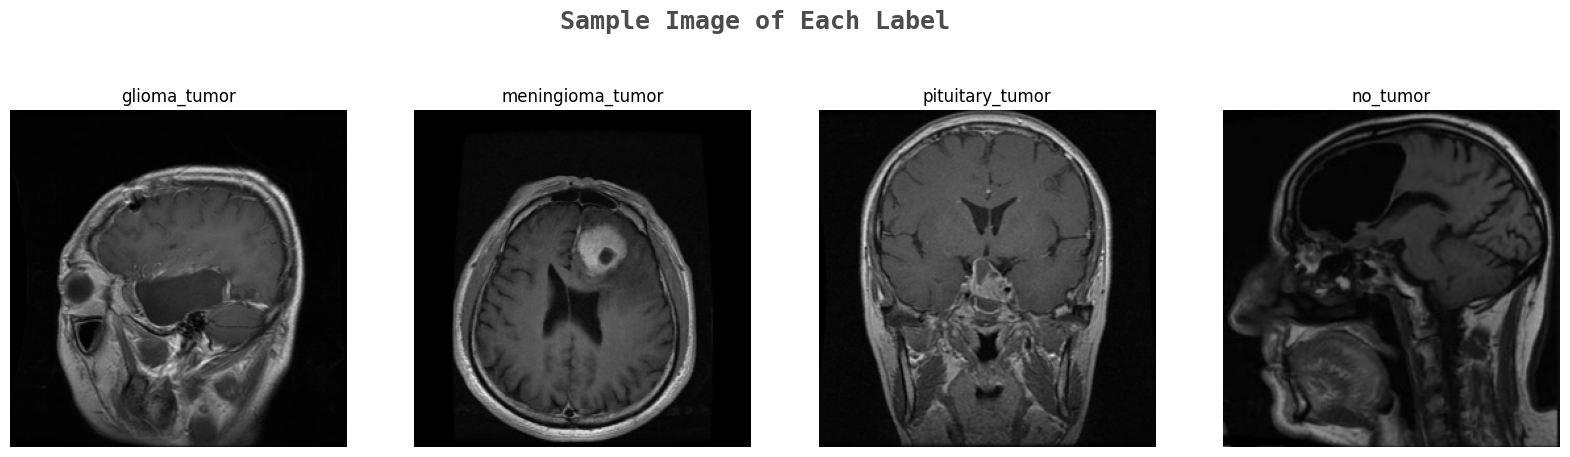

In [258]:
# Display a sample image of each tumor class (label).

plot_counter=0
# Create a subplot with one row and four columns (one column for each class).
fig, ax = plt.subplots(1,4,figsize=(20,20))
# Set the text and position for the subplot figure.
fig.text(s="Sample Image of Each Label",size=18,fontweight="bold",
             fontname="monospace",color="#1F1F1F",y=0.62,x=0.4,alpha=0.8)

# For each tumor class (label):
for label in labels:
    image_counter=0
    while True :
        # Find a matching label in the training data.
        if y_array[image_counter]==label:
            # Create a plot of the image, using the image from the X data and the associated label from the y data.
            ax[plot_counter].imshow(X_array[image_counter])
            ax[plot_counter].set_title(y_array[image_counter])
            ax[plot_counter].axis('off')
            plot_counter+=1
            break
        image_counter+=1

Text(0.5, 0, 'Training Image Count by Class')

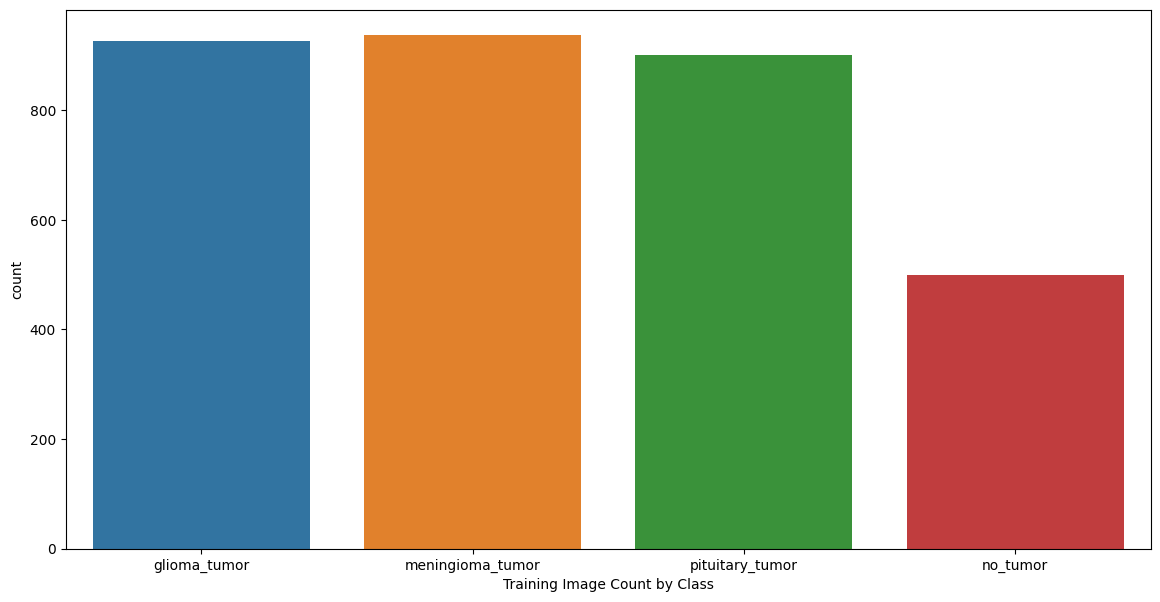

In [259]:
# Create chart of label counts.

# Set figure size and title.
plt.figure(figsize = (14,7));
figure_title = "Training Image Count by Class"
# Create a countplot using seaborn.
sns.countplot(x=y_array, hue=y_array);
plt.xlabel(figure_title)


In [260]:
# Augment the no tumor training class images to addresss the class imbalance.
# Augment pictures (rotate, shift, flip).

# Create a separate array that contains the no tumor images.
no_tumor_array = X_array[y_array == "no_tumor"]
print("no_tumor_array shape:", no_tumor_array.shape)
# The array contains 500 images.

# Directory path to save augmented images to.
augmented_img_path = "/Users/sh/Documents/School/UCSD Extension /Machine Learning and AI/Capstone/Project Files/Data/augmented"

# Create and ImageDataGenerator to augment the images (rotate 25 degrees, shift width and height 10%, flip horizontal).
image_augmenter = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Apply the augmentation to the no tumor data.
image_augmenter.fit(no_tumor_array)

# Create augmented images and labels.
# Chose to generate 320 images (256+64 = 320).
image_counter = 0
for batch in image_augmenter.flow(x=no_tumor_array, batch_size=1, save_to_dir=augmented_img_path, save_prefix='no_tumor', save_format='jpeg'):
    image_counter += 1    
# Stop after generating 320 images
    if image_counter == 320:
        break




no_tumor_array shape: (500, 256, 256, 3)


In [261]:
# Create an array for the labels:
no_tumor_labels_array = np.full((320,), "no_tumor", dtype= "<U16")

# Create an empty array for the augmented images
X_augmented = []


# oslsitdir below picking up hidden files? Yes! Use glob instead.

# Read in the augmented images.
# Use tqdm to show progress bar.
augmented_images = glob.glob(augmented_img_path + "/*.jpeg")
#for image_filename in tqdm(os.listdir(augmented_img_path)):
for image_filename in augmented_images:  
    image = cv2.imread(os.path.join(augmented_img_path, image_filename))
    X_augmented.append(image)

print("X_augmented length:", len(X_augmented))

X_augmented length: 320


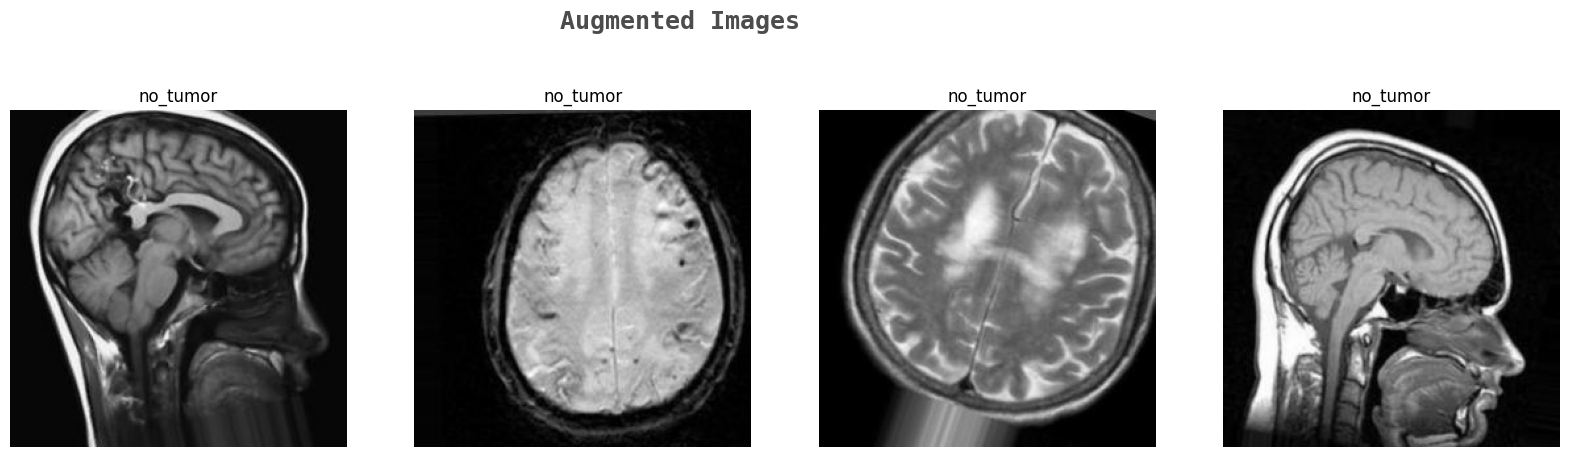

In [262]:
# Display a few augmented images.
# Could also have displayed some images while generating images in the above step, but kept separate so easier to read the code.

# Create a subplot with one row and four columns.
fig, ax = plt.subplots(1,4,figsize=(20,20))
# Set the text and position for the subplot figure.
fig.text(s="Augmented Images",size=18,fontweight="bold",
             fontname="monospace",color="#1F1F1F",y=0.62,x=0.4,alpha=0.8)

# Generate 4 random numbers that fall within (0, 320).
image_counter=0
random.seed(123)
# Note setting the seed just means that you always show the image from the same index in the X_augmented list.
# Everytime you run the code that actual tranformation applied to generate each image will be different.
random_list = random.sample(range(0, 320), 4)

# Plot 4 randomly selected images
while image_counter < len(random_list):
    # Create a plot of the image, using the image from the X augmented data and the associated label from the y training data.
    ax[image_counter].imshow(X_augmented[random_list[image_counter]])
    ax[image_counter].set_title(no_tumor_labels_array[random_list[image_counter]])
    ax[image_counter].axis('off')

    image_counter+=1



In [264]:
# Add the augmented no tumor images and labels to the X and y data.

print("X_array", type(X_array), X_array.shape)
X_array = np.append(X_array, np.array(X_augmented))

print("y_array", type(y_array), y_array.shape)
y_array = np.append(y_array, no_tumor_labels_array) 

print("X_array", type(X_array), X_array.shape)
print("y_array", type(y_array), y_array.shape)

X_array <class 'numpy.ndarray'> (704643072,)
y_array <class 'numpy.ndarray'> (3584,)
X_array <class 'numpy.ndarray'> (767557632,)
y_array <class 'numpy.ndarray'> (3904,)


In [266]:
# One hot encode labels.


label_encoder = LabelEncoder()
y_array = label_encoder.fit_transform(y_array)

# One hot encode
y_array_encoded = to_categorical(y_array)
#y_array = to_categorical(y_array, num_classes=4)

print("y_array_encoded shape:", y_array_encoded.shape)

y_array_encoded shape: (3904, 4)
